In [1]:
import numpy as np
import tomopy 
import matplotlib.pyplot as plt
from tomoplan.gan3d import GAN3d
import tifffile

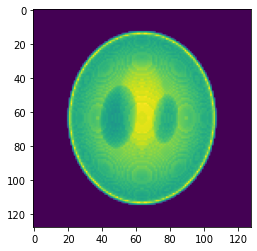

0.0 32.000046
0.0 1.0


In [2]:
data = tomopy.shepp3d()
ang = tomopy.angles(181)
prj = tomopy.project(data, ang, pad=False)
train_input = prj[0]
plt.imshow(train_input)
plt.show()
print(train_input.min(), train_input.max())
print(data.min(), data.max())

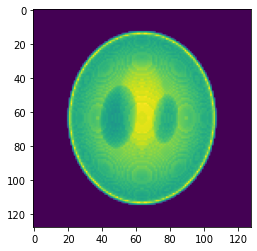

In [3]:
prj_input = np.transpose(prj, (1, 2, 0))

plt.imshow(prj_input[:,:,0])

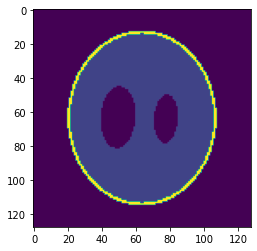

In [3]:
train_output = np.swapaxes(data, 0, 1)
plt.imshow(train_output[64,:,:])
plt.show()

In [4]:
train_input = train_input/train_input.max()

In [5]:
# from gan3d import l1_loss


train_input = np.reshape(train_input, (1, 128, 128))
train_output = np.reshape(train_output, (1, 128, 128, 128))
train_obj = GAN3d(train_input, 
                  train_output, 
                  iter_num=2000, 
                  l1_loss = 10,
                  g_learning_rate = 5e-4,
                  d_learning_rate = 1e-5,
                  save_wpath='/Users/xiaogangyang/data/gan3d_weights/')
recon = train_obj.train

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-08-31 15:21:00.184268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-31 15:21:00.184422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 128, 128, 32  9248       ['conv2d[0][0]']                 
 ose)                           )                                                             

2022-08-31 15:21:01.830861: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-31 15:21:01.831051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch: 1 Generator loss: 2.054295539855957 Discriminator loss: 1.400804877281189

Epoch: 101 Generator loss: 0.5046797394752502 Discriminator loss: 4.013461112976074

Epoch: 201 Generator loss: 0.3791419267654419 Discriminator loss: 4.399477481842041

Epoch: 301 Generator loss: 0.3341710567474365 Discriminator loss: 4.756128311157227

Epoch: 401 Generator loss: 0.32671523094177246 Discriminator loss: 4.711215019226074

Epoch: 501 Generator loss: 0.27681511640548706 Discriminator loss: 4.748831748962402

Epoch: 601 Generator loss: 0.2674102485179901 Discriminator loss: 4.794643878936768

Epoch: 701 Generator loss: 0.23763175308704376 Discriminator loss: 4.894704818725586

Epoch: 801 Generator loss: 0.22938042879104614 Discriminator loss: 5.051969051361084

Epoch: 901 Generator loss: 0.2152053713798523 Discriminator loss: 4.917131423950195

Epoch: 1001 Generator loss: 0.2110419124364853 Discriminator loss: 5.067954063415527

Epoch: 1101 Generator loss: 0.2047925442457199 Discriminator lo

In [6]:
from tensorflow.keras.models import load_model
model = load_model('/Users/xiaogangyang/data/gan3d_weights/3d_generator.h5')
model.summary()
test_input = np.reshape(prj[0], (1, 128, 128, 1))
test_output = model(test_input)
test_output = test_output.numpy()
# test_output = recon_model.predict(test_input)
tifffile.imwrite('/Users/xiaogangyang/data/3d_predict_resnet_20220831.tiff', test_output.reshape((128, 128, 128)))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 128, 128, 32  9248       ['conv2d[0][0]']                 
 ose)                           )                                                             